In [41]:
import pandas as pd
import os
import math
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
plt.rcParams['figure.figsize']=(6,4)
plt.rcParams['font.size']=14
os.chdir('/Users/michaeltwardos/Desktop/') #PLEASE SET THIS WORKING DIRECTORY TO YOURS
data = pd.read_csv('Asana Users.csv')
data.head()

/Users/michaeltwardos/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


,user_id,mailing_list,drip,invited,guest_invite,personal_projects,first_seven,any_seven
0,1,1,0,1,1,0,0,0
1,2,0,0,1,0,0,0,1
2,3,0,0,1,0,0,0,0
3,4,0,0,1,1,0,0,0
4,5,0,0,1,1,0,0,0


In [42]:
from sklearn.linear_model import LinearRegression

In [48]:
feature_cols = ['mailing_list', 'drip', 'invited', 'guest_invite', 'personal_projects']
linregFirst = LinearRegression()
X = data[feature_cols]
yF = data.first_seven
linregFirst.fit(X, yF)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
linregAny = LinearRegression()
X = data[feature_cols]
yA = data.any_seven
linregAny.fit(X, yA)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
data['any_pred'] = linregAny.predict(X)
data['first_pred'] = linregFirst.predict(X)
data.head(10)
#How do we get the most predictive inputs from these models?
#How do we measure correlation between each column and each signal?

,user_id,mailing_list,drip,invited,guest_invite,personal_projects,first_seven,any_seven,any_pred,first_pred
0,1,1,0,1,1,0,0,0,0.170685,0.023340
1,2,0,0,1,0,0,0,1,0.128436,0.008979
2,3,0,0,1,0,0,0,0,0.128436,0.008979
3,4,0,0,1,1,0,0,0,0.164897,0.018995
4,5,0,0,1,1,0,0,0,0.164897,0.018995
5,6,0,0,1,1,0,0,0,0.164897,0.018995
6,7,0,1,0,0,0,0,0,0.150292,0.009279
7,8,1,1,0,0,1,0,0,0.082598,0.010171
8,9,0,0,0,0,1,0,0,0.076196,0.007196
9,10,1,1,1,0,0,0,1,0.134837,0.011955


In [51]:
#Computes fraction of the list that has the val.
def prob(lst, val):
    L = len(lst)
    if L > 0:
        p = round(float(len(lst[lst==val]))/L, 3)
    else:
        p = 0
    return p

#Determines the Entropy Contribution from a given probability
def entropyContribution(p):
    if p != 0:
        return round(-p*math.log(p, 2), 3)
    else:
        return 0
    
#Computes the entropy given a binary probability - 1 or 0
def binaryEntropy(p):
    S = entropyContribution(p) + entropyContribution(1-p)
    return S

In [16]:
prob(data.mailing_list, 1)

0.249

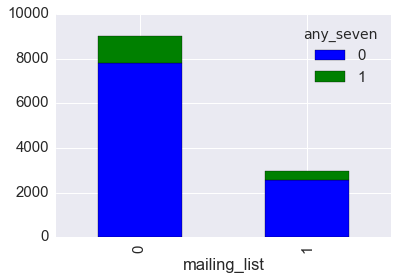

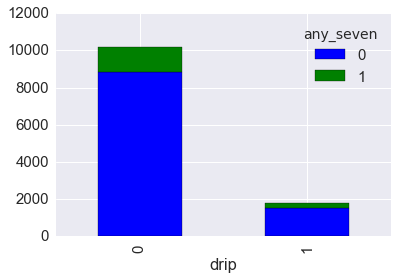

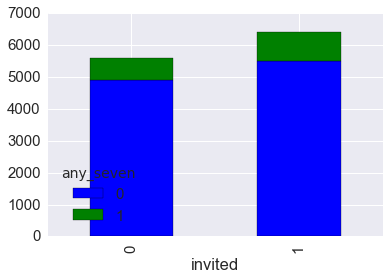

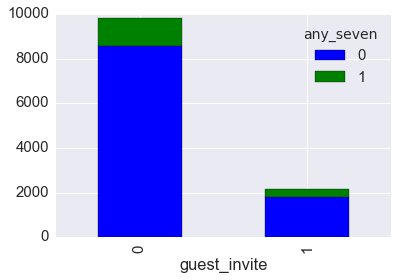

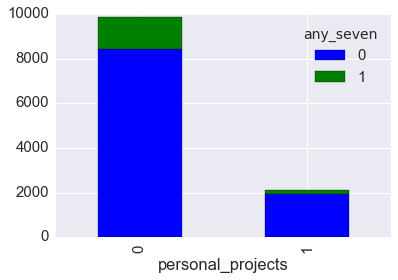

In [52]:
[data.groupby(['mailing_list', 'any_seven'])['any_seven'].count().\
 unstack('any_seven').plot(kind='bar', stacked=True),
 data.groupby(['drip', 'any_seven'])['any_seven'].count().\
 unstack('any_seven').plot(kind='bar', stacked=True),
 data.groupby(['invited', 'any_seven'])['any_seven'].count().\
 unstack('any_seven').plot(kind='bar', stacked=True),
 data.groupby(['guest_invite', 'any_seven'])['any_seven'].count().\
 unstack('any_seven').plot(kind='bar', stacked=True),
 data.groupby(['personal_projects', 'any_seven'])['any_seven'].count().\
 unstack('any_seven').plot(kind='bar', stacked=True)]

In [ ]:
# From visual inspection we can see that there are almost no engaged 
# users found for the creation_source = 'personal projects'

In [31]:
print binaryEntropy(prob(data.any_seven, 1))

0.569


In [30]:
#Compute the Absolute Conditional Entropy from using a
print 'mailing_list'
print prob(data.mailing_list, 1)*binaryEntropy(prob(data[data.mailing_list==1].any_seven, 1)) + \
      prob(data.mailing_list, 0)*binaryEntropy(prob(data[data.mailing_list==0].any_seven, 1))

print 'drip'
print prob(data.drip, 1)*binaryEntropy(prob(data[data.drip==1].any_seven, 1)) + \
      prob(data.drip, 0)*binaryEntropy(prob(data[data.drip==0].any_seven, 1))

print 'invited'
print prob(data.invited, 1)*binaryEntropy(prob(data[data.invited==1].any_seven, 1)) + \
      prob(data.invited, 0)*binaryEntropy(prob(data[data.invited==0].any_seven, 1))

print 'guest_invite'
print prob(data.guest_invite, 1)*binaryEntropy(prob(data[data.guest_invite==1].any_seven, 1)) + \
      prob(data.guest_invite, 0)*binaryEntropy(prob(data[data.guest_invite==0].any_seven, 1))

print 'personal_projects'
print prob(data.personal_projects, 1)*binaryEntropy(prob(data[data.personal_projects==1].any_seven, 1)) + \
      prob(data.personal_projects, 0)*binaryEntropy(prob(data[data.personal_projects==0].any_seven, 1))

mailing_list
0.566421
drip
0.56749
invited
0.56582
guest_invite
0.56518
personal_projects
0.561448


In [32]:
from sklearn.tree import DecisionTreeClassifier
classify=DecisionTreeClassifier(random_state=1)

In [37]:
feature_cols = ['mailing_list', 'drip', 'invited', 'guest_invite', 'personal_projects']
X=data[feature_cols]
y=data.any_seven
classify.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [38]:
classify.feature_importances_

array([ 0.02248217,  0.0411652 ,  0.08005508,  0.11383704,  0.74246051])